In [1]:
import networkx as nx
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid, Actor
from torch_geometric.transforms import NormalizeFeatures
from copy import deepcopy
import itertools

In [2]:
import time

In [3]:
import os

os.chdir('/'.join(os.getcwd().split('\\')[:-2]))
from src import *

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CORA

In [5]:
# Cora model:
cora = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g = create_train_test_split_edge(cora[0])

In [48]:
base_feats = PCA().fit_transform(cora[0]['x'])

In [55]:
cora[0]['x']=base_feats

In [54]:
base_feats

array([[-3.30007013e-02,  1.40530440e-01,  5.01242076e-02, ...,
         1.84129453e-11, -1.55406273e-17, -7.22497238e-19],
       [-2.01500186e-02,  9.41849221e-03,  2.60799871e-02, ...,
        -7.18469841e-11,  5.11323442e-18,  2.01636660e-18],
       [ 2.13939390e-02,  1.15853124e-02,  2.23354489e-02, ...,
         1.87943904e-10, -6.73917689e-18, -2.80373269e-18],
       ...,
       [ 3.76131337e-02, -1.09910298e-02, -1.63430166e-02, ...,
        -7.95456720e-12, -3.89573685e-18, -1.41446616e-18],
       [-2.99786951e-02,  8.15911609e-02,  2.03490585e-02, ...,
        -4.54178735e-10, -2.72170916e-18, -1.61674590e-18],
       [-1.92818406e-02,  8.49017311e-02,  1.98150821e-02, ...,
        -4.35229919e-10,  1.82315384e-17,  3.84571214e-18]])

In [59]:
test = cora[0]

In [63]:
test['x']=torch.tensor(base_feats)

In [64]:
test['x']

tensor([[-3.3001e-02,  1.4053e-01,  5.0124e-02,  ...,  1.8413e-11,
         -1.5541e-17, -7.2250e-19],
        [-2.0150e-02,  9.4185e-03,  2.6080e-02,  ..., -7.1847e-11,
          5.1132e-18,  2.0164e-18],
        [ 2.1394e-02,  1.1585e-02,  2.2335e-02,  ...,  1.8794e-10,
         -6.7392e-18, -2.8037e-18],
        ...,
        [ 3.7613e-02, -1.0991e-02, -1.6343e-02,  ..., -7.9546e-12,
         -3.8957e-18, -1.4145e-18],
        [-2.9979e-02,  8.1591e-02,  2.0349e-02,  ..., -4.5418e-10,
         -2.7217e-18, -1.6167e-18],
        [-1.9282e-02,  8.4902e-02,  1.9815e-02,  ..., -4.3523e-10,
          1.8232e-17,  3.8457e-18]], dtype=torch.float64)

In [65]:
train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g = create_train_test_split_edge(test)

In [70]:
train_g=train_g.to(device)
train_pos_g=train_pos_g.to(device)
train_neg_g=train_neg_g.to(device)
test_pos_g=test_pos_g.to(device)
test_neg_g=test_neg_g.to(device)

In [66]:
cora.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

## GraphSAGE

### Mean Agg

In [6]:
model = GraphSAGE(train_g.ndata["x"].shape[1], 32)
model=model.to(device)
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.01
)

In [8]:
train_link_pred(1000, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g)

In epoch 5, loss: 0.6827263236045837
In epoch 10, loss: 0.6037890315055847
In epoch 15, loss: 0.520629346370697
In epoch 20, loss: 0.4626871347427368
In epoch 25, loss: 0.43558749556541443
In epoch 30, loss: 0.40310579538345337
In epoch 35, loss: 0.370798796415329
In epoch 40, loss: 0.3388617932796478
In epoch 45, loss: 0.30553463101387024
In epoch 50, loss: 0.27012431621551514
In epoch 55, loss: 0.2348836362361908
In epoch 60, loss: 0.19986510276794434
In epoch 65, loss: 0.1660657823085785
In epoch 70, loss: 0.1340884566307068
In epoch 75, loss: 0.1046941876411438
In epoch 80, loss: 0.07834262400865555
In epoch 85, loss: 0.05598825588822365
In epoch 90, loss: 0.038045693188905716
In epoch 95, loss: 0.024717846885323524
In epoch 100, loss: 0.015646131709218025
AUC 0.8390476404393433
In epoch 105, loss: 0.009871537797152996
In epoch 110, loss: 0.006335587240755558
In epoch 115, loss: 0.004174071364104748
In epoch 120, loss: 0.0028533022850751877
In epoch 125, loss: 0.0020458803046494722

In epoch 975, loss: 1.1197528692719061e-05
In epoch 980, loss: 1.1082400305895135e-05
In epoch 985, loss: 1.0968301467073616e-05
In epoch 990, loss: 1.0856972949113697e-05
In epoch 995, loss: 1.0746447514975443e-05
In epoch 1000, loss: 1.0638144885888323e-05
AUC 0.8435794344242042


### Pool Agg

In [8]:
model = GraphSAGE(train_g.ndata["x"].shape[1], 32, agg='pool')
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.01
)

In [9]:
import time

In [10]:
start=time.time()
train_link_pred(1000, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g)
print('\n'+'Time:',time.time()-start)

In epoch 5, loss: 1.0531113730394281e-05
In epoch 10, loss: 1.0425682376080658e-05
In epoch 15, loss: 1.0321818990632892e-05
In epoch 20, loss: 1.0219674550171476e-05
In epoch 25, loss: 1.0118860700458754e-05
In epoch 30, loss: 1.0019294677476864e-05
In epoch 35, loss: 9.921465789375361e-06
In epoch 40, loss: 9.825149390962906e-06
In epoch 45, loss: 9.729886187415104e-06
In epoch 50, loss: 9.636203685658984e-06
In epoch 55, loss: 9.543926353217103e-06
In epoch 60, loss: 9.452308404434007e-06
In epoch 65, loss: 9.363135177409276e-06
In epoch 70, loss: 9.273812793253455e-06
In epoch 75, loss: 9.186521310766693e-06
In epoch 80, loss: 9.099997441808227e-06
In epoch 85, loss: 9.014658644446172e-06
In epoch 90, loss: 8.93096876097843e-06
In epoch 95, loss: 8.847842764225788e-06
In epoch 100, loss: 8.765883649175521e-06
AUC 0.8435749421621257
In epoch 105, loss: 8.685507054906338e-06
In epoch 110, loss: 8.605461516708601e-06
In epoch 115, loss: 8.526971214450896e-06
In epoch 120, loss: 8.4496

In epoch 980, loss: 2.5339757030451437e-06
In epoch 985, loss: 2.5199672109010862e-06
In epoch 990, loss: 2.505920974726905e-06
In epoch 995, loss: 2.49191884904576e-06
In epoch 1000, loss: 2.4782741547824116e-06
AUC 0.8435524808517327

 5.93447732925415


### LSTM Agg

In [8]:
model = GraphSAGE(train_g.ndata["x"].shape[1], 32, agg='lstm')
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.01
)

In [9]:
train_link_pred(1000, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g)

In epoch 5, loss: 0.6888569593429565
In epoch 10, loss: 0.6576717495918274
In epoch 15, loss: 0.5815128087997437
In epoch 20, loss: 0.5191725492477417
In epoch 25, loss: 0.4712483882904053
In epoch 30, loss: 0.4452245235443115
In epoch 35, loss: 0.4097415506839752
In epoch 40, loss: 0.3833618760108948
In epoch 45, loss: 0.35520023107528687
In epoch 50, loss: 0.32729968428611755
In epoch 55, loss: 0.29808664321899414
In epoch 60, loss: 0.2682197690010071
In epoch 65, loss: 0.23794840276241302
In epoch 70, loss: 0.2076166570186615
In epoch 75, loss: 0.17821840941905975
In epoch 80, loss: 0.1500256508588791
In epoch 85, loss: 0.1233985647559166
In epoch 90, loss: 0.09837648272514343
In epoch 95, loss: 0.07606442272663116
In epoch 100, loss: 0.056776903569698334
AUC 0.8300667100918667
In epoch 105, loss: 0.04092235863208771
In epoch 110, loss: 0.028636062517762184
In epoch 115, loss: 0.019585611298680305
In epoch 120, loss: 0.013291393406689167
In epoch 125, loss: 0.009067066013813019
In e

### GCN Agg

In [14]:
model = GraphSAGE(train_g.ndata["x"].shape[1], 32, agg='gcn')
model.to(device)
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.01
)

In [15]:
start=time.time()
train_link_pred(1000, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g)
print('\n'+'Time:',time.time()-start)

In epoch 5, loss: 0.6859399080276489
In epoch 10, loss: 0.6432526111602783
In epoch 15, loss: 0.5632478594779968
In epoch 20, loss: 0.5388811826705933
In epoch 25, loss: 0.5092340111732483
In epoch 30, loss: 0.4958515465259552
In epoch 35, loss: 0.47492873668670654
In epoch 40, loss: 0.4644346237182617
In epoch 45, loss: 0.45353296399116516
In epoch 50, loss: 0.4405198395252228
In epoch 55, loss: 0.42921268939971924
In epoch 60, loss: 0.4169336259365082
In epoch 65, loss: 0.4051946699619293
In epoch 70, loss: 0.39413154125213623
In epoch 75, loss: 0.3829694092273712
In epoch 80, loss: 0.3713498115539551
In epoch 85, loss: 0.3600638210773468
In epoch 90, loss: 0.3493596613407135
In epoch 95, loss: 0.33894455432891846
In epoch 100, loss: 0.32870492339134216
AUC 0.8737611464252824
In epoch 105, loss: 0.31884509325027466
In epoch 110, loss: 0.3093106746673584
In epoch 115, loss: 0.30082541704177856
In epoch 120, loss: 0.29147788882255554
In epoch 125, loss: 0.2831856608390808
In epoch 130,

In epoch 990, loss: 0.00025596952764317393
In epoch 995, loss: 0.0002523177827242762
In epoch 1000, loss: 0.0002487432211637497
AUC 0.8088659284382651

Time: 5.561917543411255


## GraphEVE

In [37]:
feats = np.loadtxt(f'LM_embed_pubmed.txt')

In [38]:
feats.shape

(19717, 384)

In [18]:
from sklearn.decomposition import PCA

In [27]:
import pandas as pd

In [30]:
import matplotlib.pyplot as plt

In [39]:
test = PCA().fit(feats)

In [40]:
out = PCA().fit_transform(feats)

In [41]:
out.shape

(19717, 384)

In [42]:
pca_LM = pd.DataFrame(out)

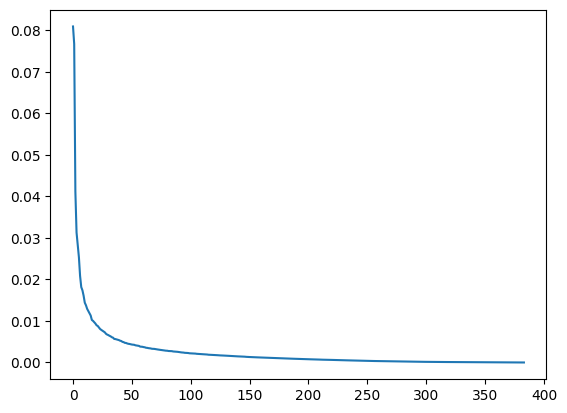

In [43]:
plt.plot(test.explained_variance_ratio_)
plt.show()

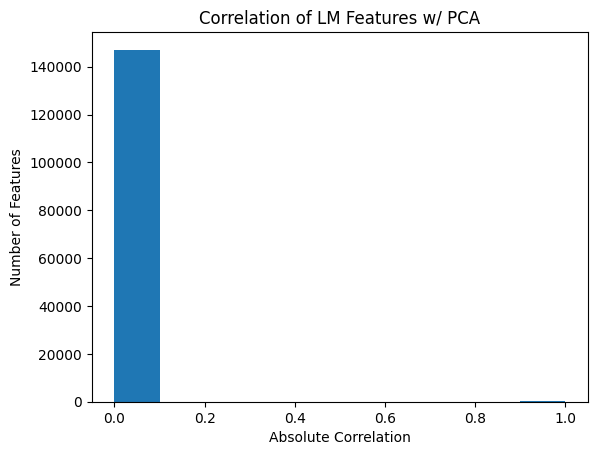

In [44]:
plt.hist(np.abs(pca_LM.corr()).to_numpy().flatten())
plt.title('Correlation of LM Features w/ PCA')
plt.ylabel('Number of Features')
plt.xlabel('Absolute Correlation')
plt.show()

In [68]:
model = GraphEVE(train_g.ndata["x"].shape[1], 32)
model=model.to(device)
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.001
)

In [71]:
start=time.time()
train_link_pred(1000, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g,reg=5)
#train_edge_pred(1000, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g, reg=1)
print('\n'+'Time:',time.time()-start)

In epoch 5, loss: 8.023795127868652
In epoch 10, loss: 8.008218765258789
In epoch 15, loss: 7.987503528594971
In epoch 20, loss: 7.959414482116699
In epoch 25, loss: 7.937697410583496
In epoch 30, loss: 7.936300277709961
In epoch 35, loss: 7.950799942016602
In epoch 40, loss: 7.971898555755615
In epoch 45, loss: 8.00599193572998
In epoch 50, loss: 8.0441255569458
In epoch 55, loss: 8.040535926818848
In epoch 60, loss: 8.0398588180542
In epoch 65, loss: 8.0381498336792
In epoch 70, loss: 8.027362823486328
In epoch 75, loss: 8.024637222290039
In epoch 80, loss: 8.01672077178955
In epoch 85, loss: 8.01039981842041
In epoch 90, loss: 8.006608009338379
In epoch 95, loss: 8.015646934509277
In epoch 100, loss: 8.010869979858398
AUC 0.781275353204106
In epoch 105, loss: 8.012894630432129
In epoch 110, loss: 8.018940925598145
In epoch 115, loss: 8.010862350463867
In epoch 120, loss: 8.008439064025879
In epoch 125, loss: 8.013249397277832
In epoch 130, loss: 8.010697364807129
In epoch 135, loss:

# Actors

In [ ]:
#Actor model
actor = Actor(root='data/Actor', transform=NormalizeFeatures())
train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g = create_train_test_split_edge(actor[0])

## GraphSAGE 

### Mean Agg

In [10]:


model = GraphSAGE(train_g.ndata["x"].shape[1], 16, agg='mean')
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.01
)

In [11]:
train_link_pred(100, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g)

In epoch 5, loss: 0.6794610023498535
In epoch 10, loss: 0.6584976315498352
In epoch 15, loss: 0.6445634961128235
In epoch 20, loss: 0.6313113570213318
In epoch 25, loss: 0.6205123662948608
In epoch 30, loss: 0.6073060631752014
In epoch 35, loss: 0.5939508080482483
In epoch 40, loss: 0.5797938108444214
In epoch 45, loss: 0.5657353401184082
In epoch 50, loss: 0.5518573522567749
In epoch 55, loss: 0.5376840829849243
In epoch 60, loss: 0.5238639116287231
In epoch 65, loss: 0.5103583931922913
In epoch 70, loss: 0.4968482255935669
In epoch 75, loss: 0.48375794291496277
In epoch 80, loss: 0.4703128933906555
In epoch 85, loss: 0.4572541117668152
In epoch 90, loss: 0.444673091173172
In epoch 95, loss: 0.4319523870944977
In epoch 100, loss: 0.41902974247932434
AUC 0.6911229523514377


## GraphEVE

## GraphEVE

In [14]:
model = GraphEVE(train_g.ndata["x"].shape[1], 32)
pred = DotPredictor()
optimizer = torch.optim.Adam(
    itertools.chain(model.parameters(), pred.parameters()), lr=0.001
)

In [15]:
train_link_pred(100, model, pred, optimizer, train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g)

In epoch 5, loss: 2.2132632732391357
In epoch 10, loss: 1.2318150997161865
In epoch 15, loss: 0.9657252430915833
In epoch 20, loss: 0.8029099106788635
In epoch 25, loss: 0.7689588665962219
In epoch 30, loss: 0.7458599805831909
In epoch 35, loss: 0.727140486240387
In epoch 40, loss: 0.7140553593635559
In epoch 45, loss: 0.7047894597053528
In epoch 50, loss: 0.6962063908576965
In epoch 55, loss: 0.6883410215377808
In epoch 60, loss: 0.6820026636123657
In epoch 65, loss: 0.6768398880958557
In epoch 70, loss: 0.6719354391098022
In epoch 75, loss: 0.6674953103065491
In epoch 80, loss: 0.6633650660514832
In epoch 85, loss: 0.6592849493026733
In epoch 90, loss: 0.655174195766449
In epoch 95, loss: 0.6509707570075989
In epoch 100, loss: 0.6466691493988037
AUC 0.7213066043408167
